# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        response = requests.get(city_url)

        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | toga village
City not found. Skipping...
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | portland
Processing Record 4 of Set 1 | fale old settlement
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | somvarpet
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | sao vicente
Processing Record 9 of Set 1 | island harbour
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | bonthe
Processing Record 12 of Set 1 | kashgar
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | sparti
Processing Record 2

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,255.24,85,100,2.06,CA,1707322736
1,portland,45.5234,-122.6762,279.73,96,100,2.06,US,1707322328
2,fale old settlement,-9.3852,-171.2468,301.49,83,100,10.98,TK,1707322737
3,blackmans bay,-43.0167,147.3167,288.22,69,81,1.38,AU,1707322737
4,somvarpet,12.6000,75.8667,292.04,63,2,0.83,IN,1707322738


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\arshd\Documents\python-api\python-api-challenge\WeatherPy\output_data\cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\arshd\Documents\python-api\python-api-challenge\WeatherPy\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,255.24,85,100,2.06,CA,1707322736
1,portland,45.5234,-122.6762,279.73,96,100,2.06,US,1707322328
2,fale old settlement,-9.3852,-171.2468,301.49,83,100,10.98,TK,1707322737
3,blackmans bay,-43.0167,147.3167,288.22,69,81,1.38,AU,1707322737
4,somvarpet,12.6000,75.8667,292.04,63,2,0.83,IN,1707322738


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

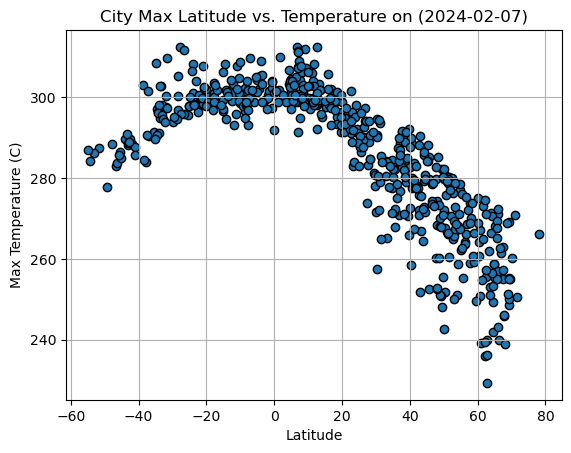

In [24]:
# Build scatter plot for latitude vs. temperature

latitude = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
date = city_data_df["Date"] 

date_format = pd.to_datetime(date, unit='s').dt.strftime('%Y-%m-%d')

plt.scatter(latitude, temp, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")  # You can specify the unit you prefer
plt.title(f"City Max Latitude vs. Temperature on ({date_format.iloc[0]})")# Using the first date as an example
plt.grid(True)


# Save the figure
plt.savefig(r"C:\Users\\arshd\Documents\python-api\python-api-challenge\WeatherPy\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

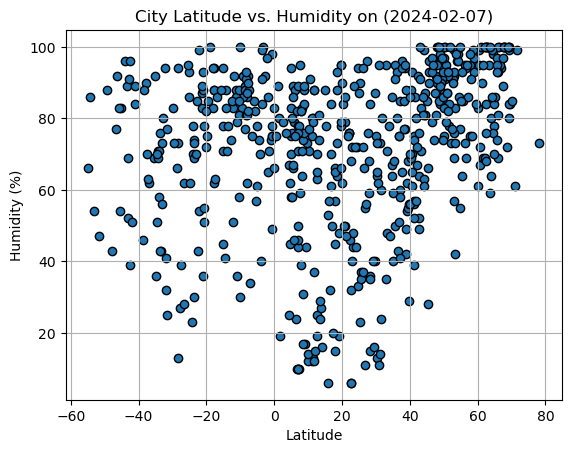

In [30]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
date = city_data_df["Date"] 

date_format_1 = pd.to_datetime(date, unit='s').dt.strftime('%Y-%m-%d')

plt.scatter(latitude, humidity, marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity on ({date_format_1.iloc[0]})")  # Using the first date as an example
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\\arshd\Documents\python-api\python-api-challenge\WeatherPy\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

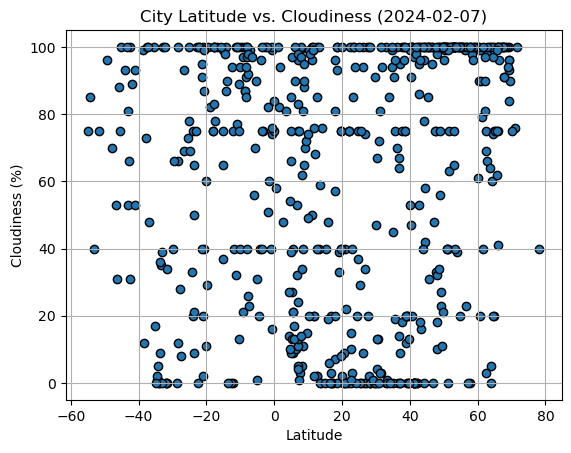

In [34]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
date = city_data_df["Date"]

date_format_2 = pd.to_datetime(date, unit='s').dt.strftime('%Y-%m-%d')

plt.scatter(latitude, cloudiness, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date_format_2[0]})") 
plt.grid(True) 

# Save the figure
plt.savefig(r"C:\Users\\arshd\Documents\python-api\python-api-challenge\WeatherPy\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

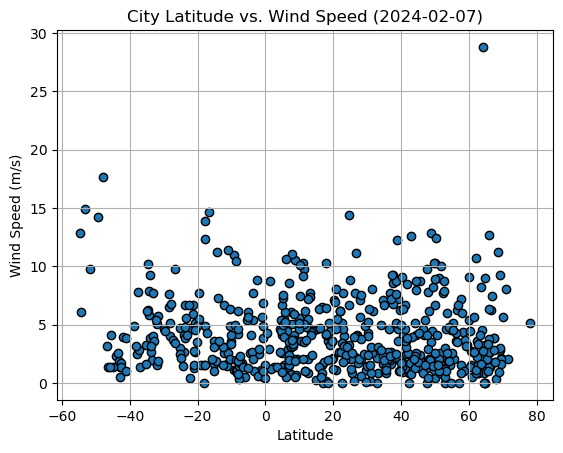

In [37]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
windspeed = city_data_df["Wind Speed"]
date = city_data_df["Date"]  

# Convert the date to a human-readable format (e.g., YYYY-MM-DD)
date_format_3 = pd.to_datetime(date, unit='s').dt.strftime('%Y-%m-%d')

plt.scatter(latitude, windspeed,marker="o", edgecolors="black")

# Incorporate the other graph properties
# Add labels and title with the formatted date
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")  # You can specify the unit you prefer
plt.title(f"City Latitude vs. Wind Speed ({date_format_3.iloc[0]})")  # Use the first date as an example
plt.grid(True)

# Save the figure
plt.savefig(r"C:\\Users\\arshd\Documents\\python-api\\python-api-challenge\WeatherPy\output_data\Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    print(f"The r-squared is: {rvalue}")
    plt.show()


In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,255.24,85,100,2.06,CA,1707322736
1,portland,45.5234,-122.6762,279.73,96,100,2.06,US,1707322328
4,somvarpet,12.6000,75.8667,292.04,63,2,0.83,IN,1707322738
7,island harbour,50.7240,-1.2758,280.49,95,100,1.79,GB,1707322739
8,iqaluit,63.7506,-68.5145,253.00,59,100,8.23,CA,1707322740


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,fale old settlement,-9.3852,-171.2468,301.49,83,100,10.98,TK,1707322737
3,blackmans bay,-43.0167,147.3167,288.22,69,81,1.38,AU,1707322737
5,papatowai,-46.5619,169.4708,282.93,77,53,3.14,NZ,1707322738
6,sao vicente,-23.9631,-46.3919,308.30,70,75,2.68,BR,1707322739
11,port-aux-francais,-49.3500,70.2167,277.90,88,96,14.20,TF,1707322741


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.88257886223759


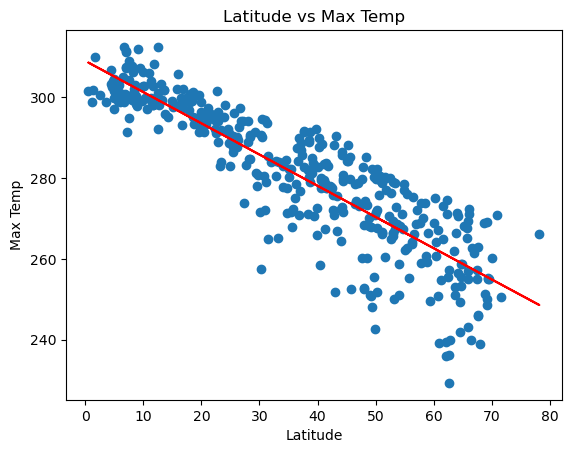

In [50]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]

plot_linear_regression(x_values,y_values, 'Max Temp', (50,40))

The r-squared is: 0.6385051383813054


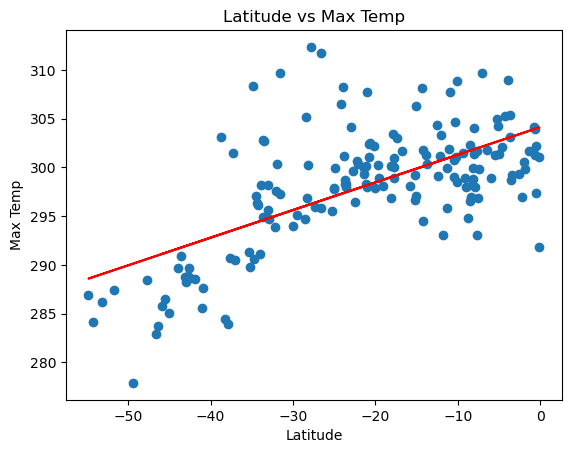

In [51]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]

plot_linear_regression(x_values,y_values, 'Max Temp', (50,40))

**Discussion about the linear relationship:** There is a good positive correlation for the southern hemisphere of approximately 0.6 and a negative correlation for the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.4744684573372684


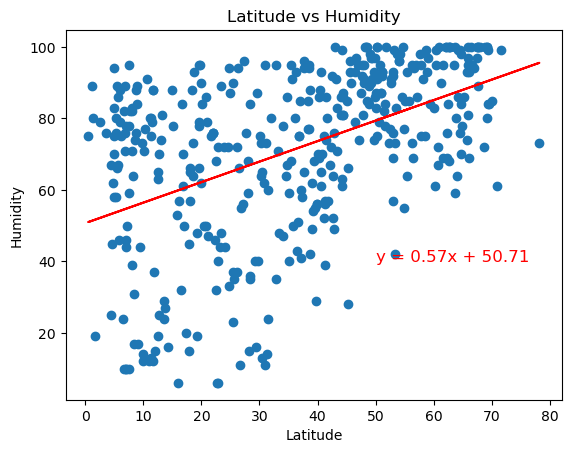

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]

plot_linear_regression(x_values,y_values, 'Humidity', (50,40))

The r-squared is: 0.20607766164109226


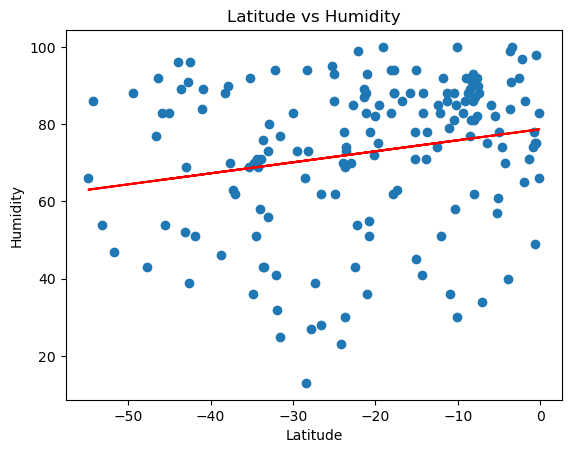

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]

plot_linear_regression(x_values,y_values, 'Humidity', (50,40))

**Discussion about the linear relationship:** There is a stronger relationship for the northern hemisphere as compared to the southern hemisphere. The southern hemisphere has a pretty weak linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3303031809883594


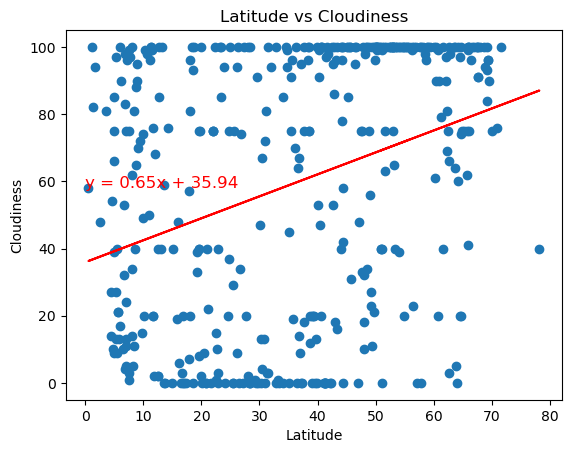

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]

plot_linear_regression(x_values,y_values, 'Cloudiness', (0,58))

The r-value is: 0.02056735429994368


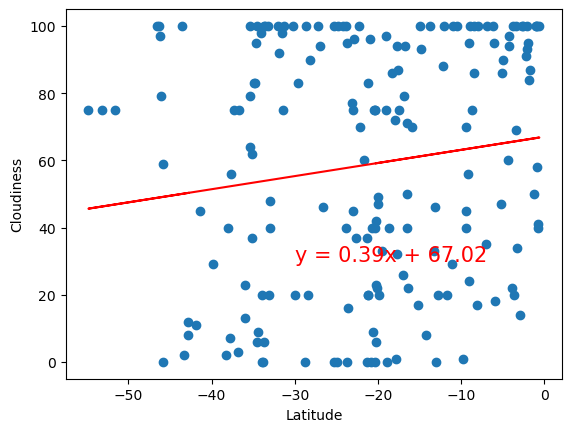

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]

plot_linear_regression(x_values,y_values, 'Cloudiness', (0,58))

**Discussion about the linear relationship:** The r-value for the southern hemisphere is close to 0 indicating that there is almost no correlation between these 2 factors. In the northern hemisphere there is a much stronger linear correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.02839219741475284


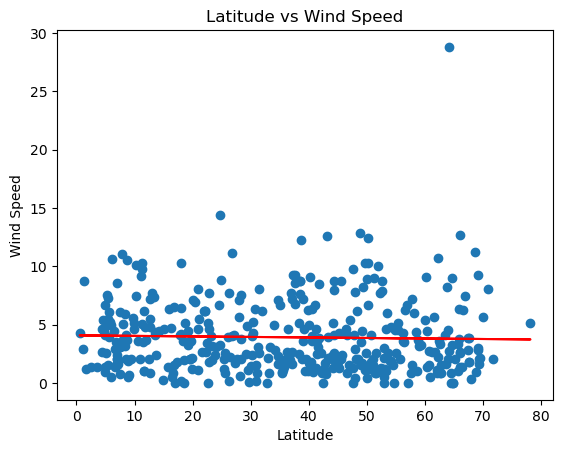

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,y_values, 'Wind Speed', (0,58))

The r-squared is: -0.21970969451540112


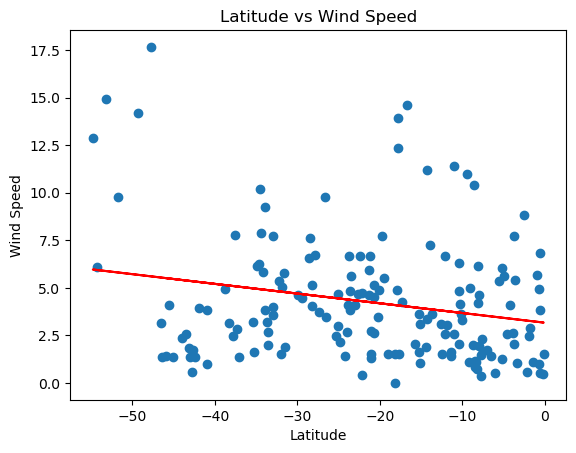

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]

plot_linear_regression(x_values,y_values, 'Wind Speed', (0,58))

**Discussion about the linear relationship:** There is a pretty weak relationship with almost no correlation with both the northern and the southern hemisphere.